# Advanced Feature Extraction in ASR
In this tutorial, we will explore different ways to do feature extraction in ASR.

**Table of contents**

1. MFCC
1. Filter Banks


In [1]:
!pip install datasets
!pip install librosa
!pip install soundfile
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "L

### Importance of Feature Extraction

Feature extraction is important as raw audio signals are complex and contain a mix of relevant and irrelevant information

Our goal is to transform raw audio into compact and meaningful representations that highlight speech patterns.

This is useful as
1. We can compress long audio files into smaller representations, speeding up training
1. We can improve on the accuracy of the ASR model as it makes it easier to distinguish different sounds and words.



### Time vs Frequency Domain

ASR Systems rely heavily on transforming speech signals from time to frequency domain to reveal the underlying frequencies that make up speech

- Time domain: Speech is represented as a waveform (Amplitude of signal over time)

- Frequency Domain: Use Discrete Fourier Transforms to decompose a time-domain signal into individual frequencies and amplitudes

- The output of the DFT tells us how much energy is present at each frequency in the original speech signal

### Spectrograms
Spectrograms are a useful way to represent the spectrum of frequencies in a sound as they vary with time

It shows how different frequencies appear, disappear or change in intensity over time in audio signals.

We can use the librosa library to plot spectrograms

Text(0.5, 1.0, 'Linear-Frequency Power Spectrogram')

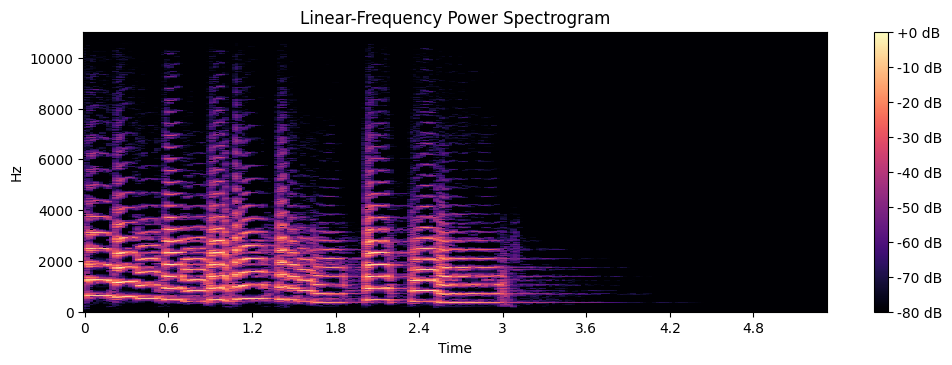

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_path = librosa.ex('trumpet')  # Using librosa's example audio
y, sr = librosa.load(audio_path, sr=22050)  # Load at 22050 Hz sample rate

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot 1: Regular Spectrogram
plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-Frequency Power Spectrogram')


### Mel Spectrograms
This is a type of spectrogram where the frequency scale is converted to the Mel scale

The Mel scale closely approximates the human auditory system's response than the linear frequency scale, making it more effective for audio-related tasks

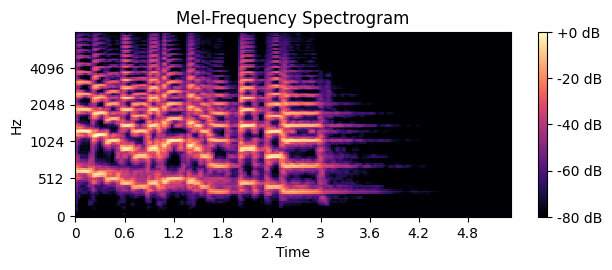

In [3]:

# Plot 2: Mel Spectrogram
plt.subplot(2, 1, 2)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency Spectrogram')

plt.tight_layout()
plt.show()

### Mel-Frequency Cepstral Coefficients (MFCC)
- Widely used in ASR for capturing essential characteristics of spoken language
- Designed to closely mimic how humans process sound frequencies
- Mel scale is a perceptual scale, meaning frequencies humans perceive as equally spaced are also linearly spaced on the scale, unlike other scales like the Hertz scale.

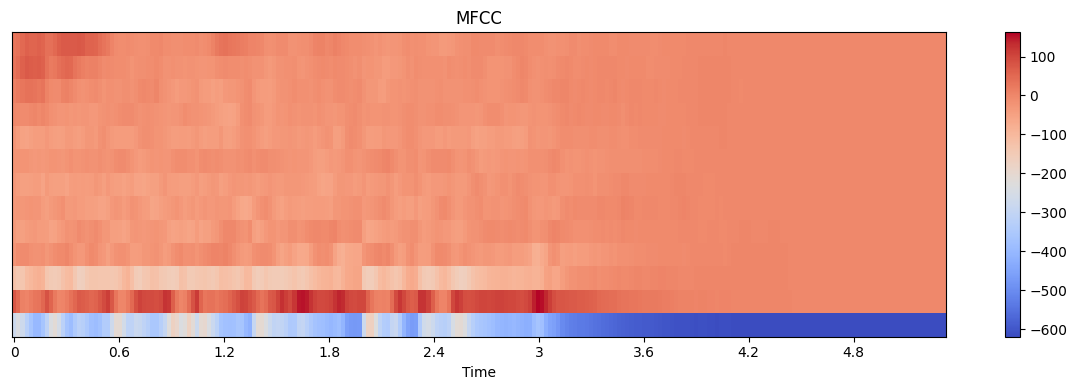

MFCC shape: (13, 230)


In [4]:
def extract_and_plot_mfcc(audio, sample_rate):
    plt.figure(figsize=(12, 4))

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    # Display MFCCs
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

    return mfccs

# Extract and plot MFCCs
mfccs = extract_and_plot_mfcc(y, sr)
print(f"MFCC shape: {mfccs.shape}")  # This shows the number of coefficients and time frames


### Filter Banks
- Filter banks are collections of bandpass filters that split audio spectrum into distinct frequency bands
- Each filter focuses on a specific frequency range
- Mel-scale filter banks are a specialised type designed for speech recognition

To implement filterbanks, we will import PyFilterbank first

We will then have to do the following tasks:
1. Compute the short-time fourier transform on the data
1. Apply filter banks onto the transforms
1. Visualise features

Optional:
We can also do MFCC on the filter bank outputs as a further option

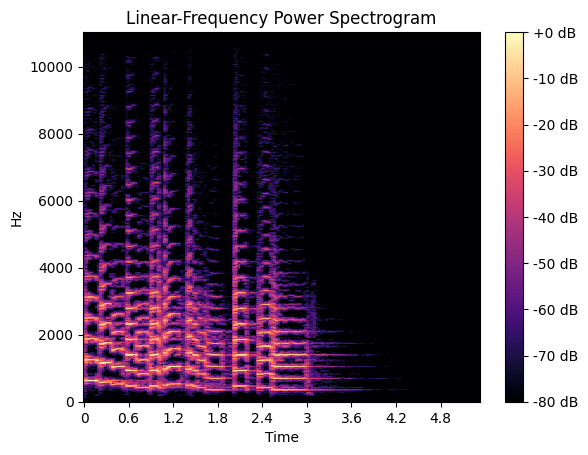

In [5]:
#Compute MFCC

# Parameters
frame_size = 0.025  # 25ms
frame_stride = 0.01  # 10ms
NFFT = 512

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)

plt.colorbar(format='%+2.0f dB')
plt.title('Linear-Frequency Power Spectrogram')
plt.show()


22050


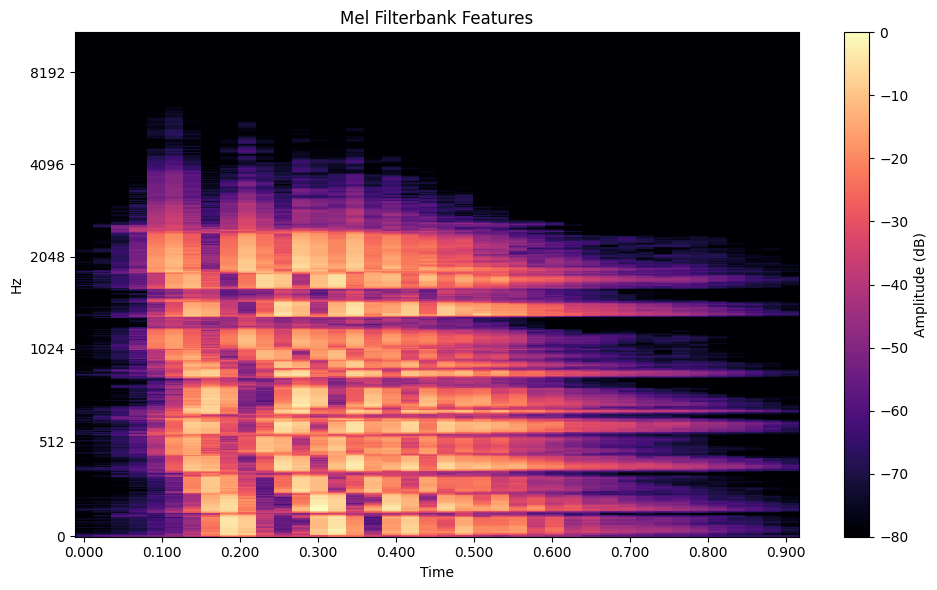

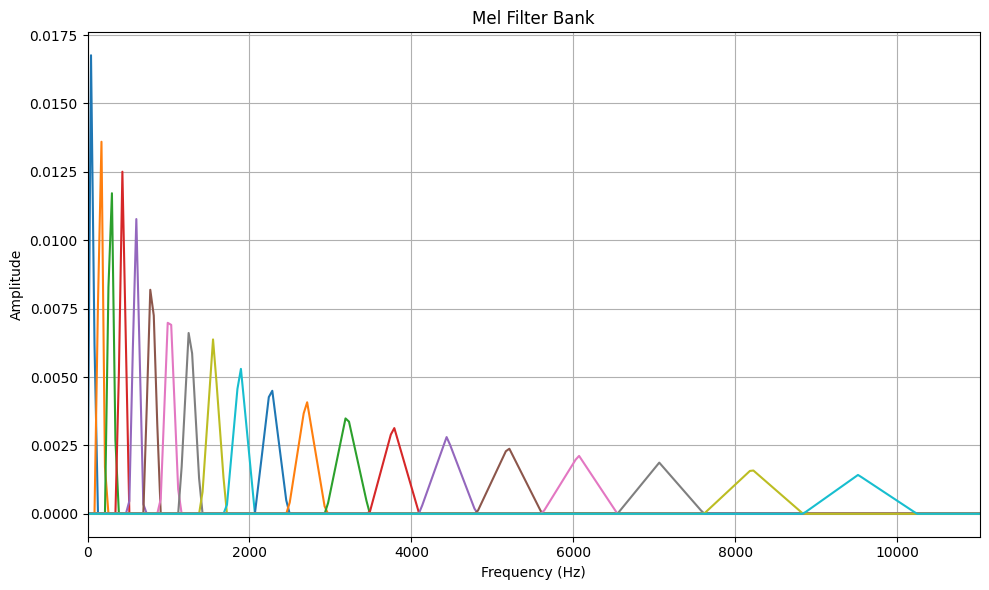

In [6]:
# Using Librosa for Mel Filterbanks
import librosa

# Parameters
num_filters = 40
low_freq = 0
print(sr)
high_freq = sr / 2  # Nyquist frequency

# Generate Mel filterbank using librosa
mel_filters = librosa.filters.mel(
    sr=sr,
    n_fft=NFFT,
    n_mels=num_filters,
    fmin=low_freq,
    fmax=high_freq,
    htk=True  # Use HTK formula, similar to common ASR implementations
)

S = librosa.stft(y, n_fft=NFFT)
power_spectrum = np.abs(S)**2

# Apply filterbank to power spectrum
mel_features = np.dot(mel_filters, power_spectrum)

# Convert to dB
mel_features_db = librosa.power_to_db(mel_features, ref=np.max)

# Plot Mel filterbank features
plt.figure(figsize=(10, 6))
librosa.display.specshow(
    mel_features_db.T,
    x_axis='time',
    y_axis='mel',
    sr=sr,
    fmin=low_freq,
    fmax=high_freq
)
plt.colorbar(label='Amplitude (dB)')
plt.title('Mel Filterbank Features')
plt.tight_layout()
plt.show()

#Plot every 2nd filter to see what it captures
plt.figure(figsize=(10, 6))
fft_freqs = librosa.fft_frequencies(sr=sr, n_fft=NFFT)
for i in range(0, num_filters, 2):  # Plot every 2nd filter
    plt.plot(fft_freqs, mel_filters[i])
plt.title('Mel Filter Bank')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, high_freq])  # Set x-axis to cover the full frequency range
plt.grid(True)
plt.tight_layout()
plt.show()

### Filter Banks
Realize that as the frequency gets higher, it captures a larger range of frequencies. This is because the mel filter is non linear.

# When to Use Filterbanks vs. MFCCs in Speech Processing

## Comparison Table

| Factor | Filterbanks | MFCCs |
|--------|-------------|-------|
| **Feature Representation** | Spectral domain representation that preserves more of the original signal's characteristics | Cepstral domain representation with decorrelated features |
| **Information Content** | Contains more information, including pitch, intonation, and speaker characteristics | Discards some information to focus on vocal tract configuration |
| **Dimensionality** | Usually higher dimensionality (typically 20-80 filters) | Lower dimensionality (typically 13-39 coefficients) |
| **Correlation** | Features are highly correlated | Features are largely decorrelated due to DCT |
| **Computational Cost** | Lower computational cost (no DCT required) | Higher computational cost (includes DCT step) |
| **Model Complexity** | Works better with complex models that can handle correlated features (e.g., deep neural networks) | Works better with models that assume feature independence (e.g., GMM-HMM with diagonal covariances) |
| **Speaker Information** | Retains more speaker-specific characteristics | Reduces speaker-specific characteristics when lower coefficients are used |
| **Noise Robustness** | Generally less robust to noise | More robust to certain types of noise due to feature decorrelation |
| **Training Data Requirements** | May require more training data for some models due to higher dimensionality | Often works better with limited training data |